*Python. Uczenie maszynowe. Wydanie drugie*, [Sebastian Raschka](https://sebastianraschka.com), Packt Publishing Ltd. 2017

Repozytorium kodu: https://github.com/rasbt/python-machine-learning-book-2nd-edition

Licencja: [MIT License](https://github.com/rasbt/python-machine-learning-book-2nd-edition/blob/master/LICENSE.txt)

# Python. Uczenie maszynowe - kod źródłowy

# Rozdział 15. Klasyfikowanie obrazów za pomocą splotowych sieci neuronowych

Zwróć uwagę, że rozszerzenie zawierające nieobowiązkowy znak wodny stanowi niewielki plugin notatnika IPython / Jupyter, który zaprojektowałem w celu powielania kodu źródłowego. Wystarczy pominąć poniższe wiersze kodu:

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka & Vahid Mirjalili' -d -p numpy,scipy,tensorflow

Sebastian Raschka & Vahid Mirjalili 2018-07-23 

numpy 1.14.5
scipy 1.1.0
tensorflow 1.9.0


*Korzystanie z rozszerzenia `watermark` nie jest obowiązkowe. Możesz je zainstalować za pomocą polecenia "`pip install watermark`". Więcej informacji na jego temat znajdziesz pod adresem: https://github.com/rasbt/watermark.*

### Spis treści

- [Podstawowe elementy splotowej sieci neuronowej](#Podstawowe-elementy-splotowej-sieci-neuronowej)
  - [Splotowe sieci neuronowe i hierarchie cech](#Splotowe-sieci-neuronowe-i-hierarchie-cech)
  - [Splot dyskretny](#Splot-dyskretny)
    - [Splot dyskretny w jednym wymiarze](#Splot-dyskretny-w-jednym-wymiarze)
    - [Uzupełnianie zerami w splocie](#Uzupełnianie-zerami-w-splocie)
    - [Określanie rozmiaru wyniku splotu](#Określanie-rozmiaru-wyniku-splotu)
    - [Splot dyskretny w dwóch wymiarach](#Splot-dyskretny-w-dwóch-wymiarach)
    - [Podpróbkowanie](#Podpróbkowanie)
  - [Konstruowanie sieci CNN](#Konstruowanie-sieci-CNN)
    - [Architektura wielowarstwowej sieci CNN](#Architektura-wielowarstwowej-sieci-CNN)
    - [Wczytywanie i wstępne przetwarzanie danych](#Wczytywanie-i-wstępne-przetwarzanie-danych)
    - [Implementowanie sieci CNN za pomocą podstawowego interfejsu TensorFlow](#Implementowanie-sieci-CNN-za-pomocą-podstawowego-interfejsu-TensorFlow)
    - [Implementowanie sieci CNN za pomocą interfejsu Layers](#Implementowanie-sieci-CNN-za-pomocą-interfejsu-Layers)
-[Podsumowanie](#Podsumowanie)

In [1]:
from IPython.display import Image
%matplotlib inline

In [2]:
# W celu zachowania kompatybilności ze środowiskiem Python 2.7
from __future__ import print_function

# Podstawowe elementy splotowej sieci neuronowej 

## Splotowe sieci neuronowe i hierarchie cech

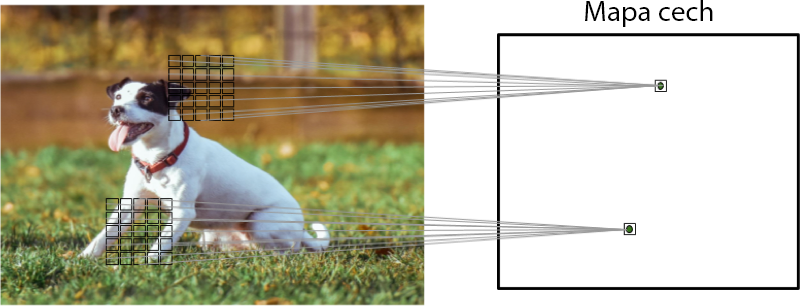

In [2]:
Image(filename='rysunki/15_01.png', width=700) 

## Splot dyskretny 

###  Splot dyskretny w jednym wymiarze

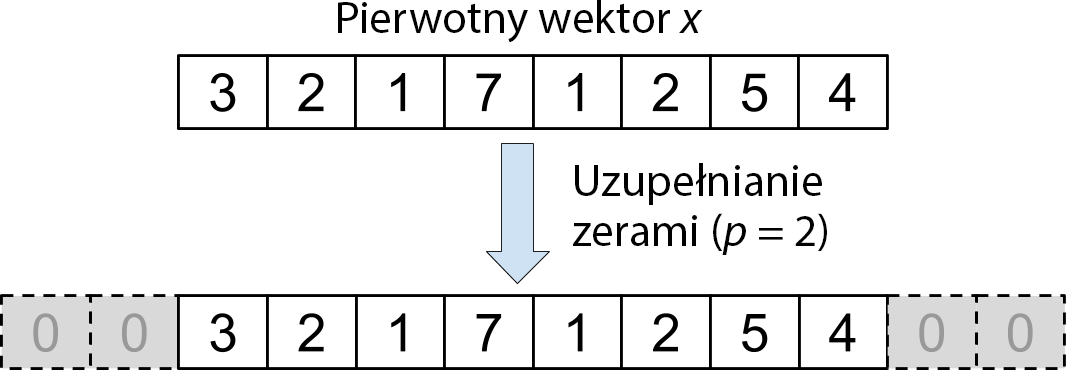

In [3]:
Image(filename='rysunki/15_02.png', width=700) 

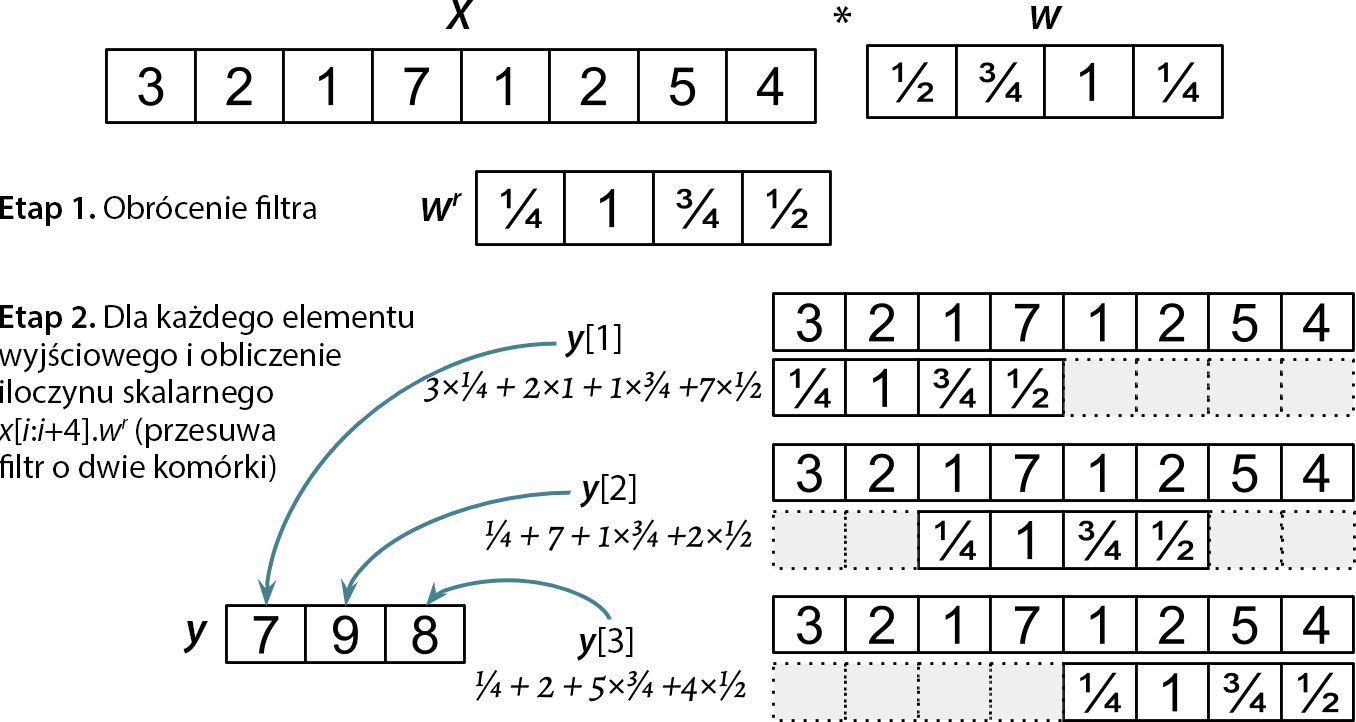

In [4]:
Image(filename='rysunki/15_03.png', width=700) 

### Uzupełnianie zerami w splocie

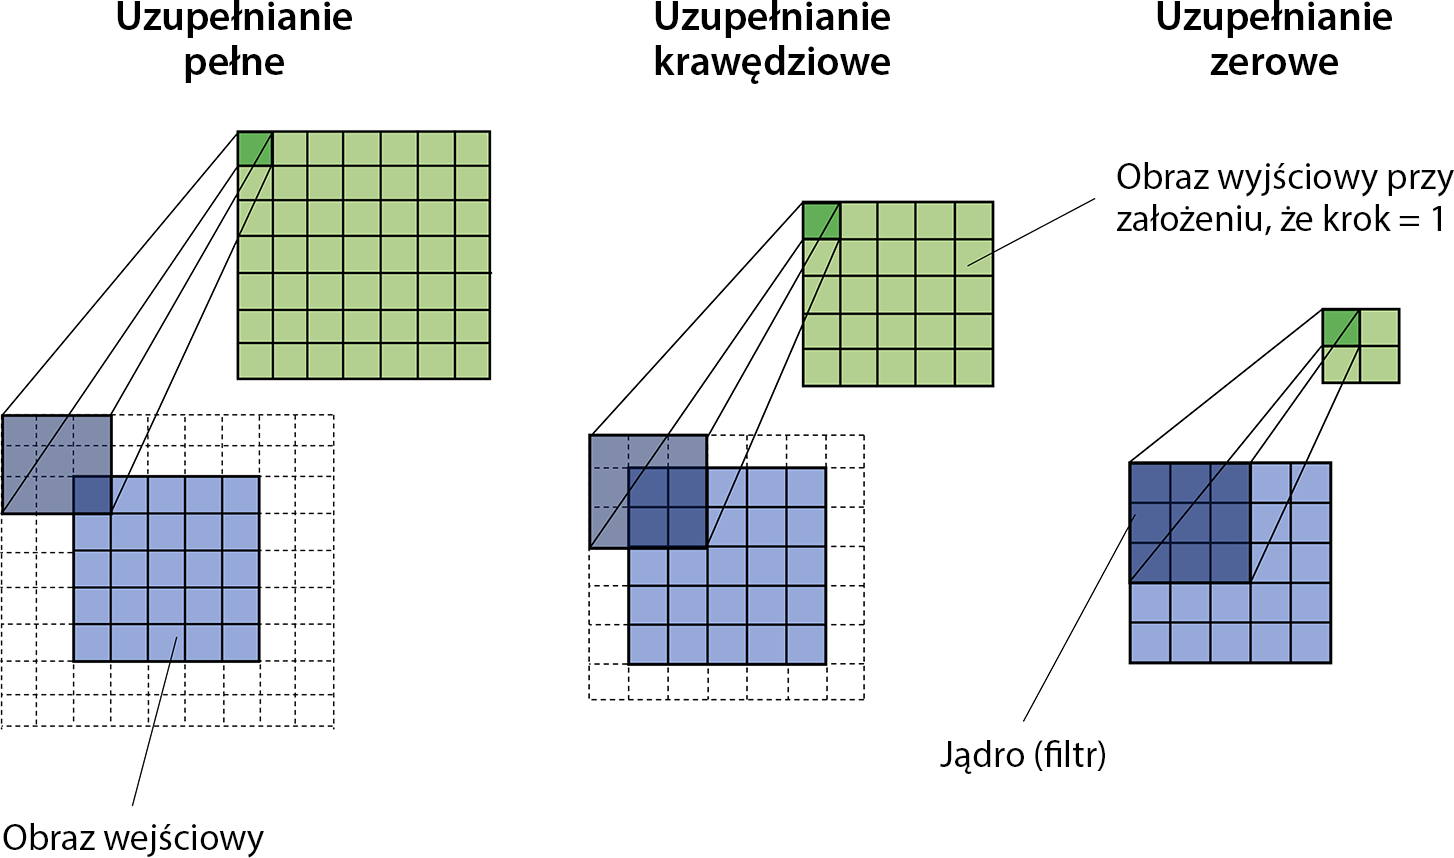

In [5]:
Image(filename='rysunki/15_11.png', width=700) 

### Określanie rozmiaru wyniku splotu

In [7]:
import numpy as np


def conv1d(x, w, p=0, s=1):
    w_rot = np.array(w[::-1])
    x_padded = np.array(x)
    if p > 0:
        zero_pad = np.zeros(shape=p)
        x_padded = np.concatenate([zero_pad, x_padded, zero_pad])
    res = []
    for i in range(0, int(len(x)/s),s):
        res.append(np.sum(x_padded[i:i+w_rot.shape[0]] * w_rot))
    return np.array(res)

## Testowanie:
x = [1, 3, 2, 4, 5, 6, 1, 3]
w = [1, 0, 3, 1, 2]
print('Implementacja jednowymiarowego splotu: ', 
      conv1d(x, w, p=2, s=1))
print('Wyniki uzyskane za pomocą NumPy:         ', 
      np.convolve(x, w, mode='same'))



Implementacja jednowymiarowego splotu:  [ 5. 14. 16. 26. 24. 34. 19. 22.]
Wyniki uzyskane za pomocą NumPy:          [ 5 14 16 26 24 34 19 22]


### Splot dyskretny w dwóch wymiarach

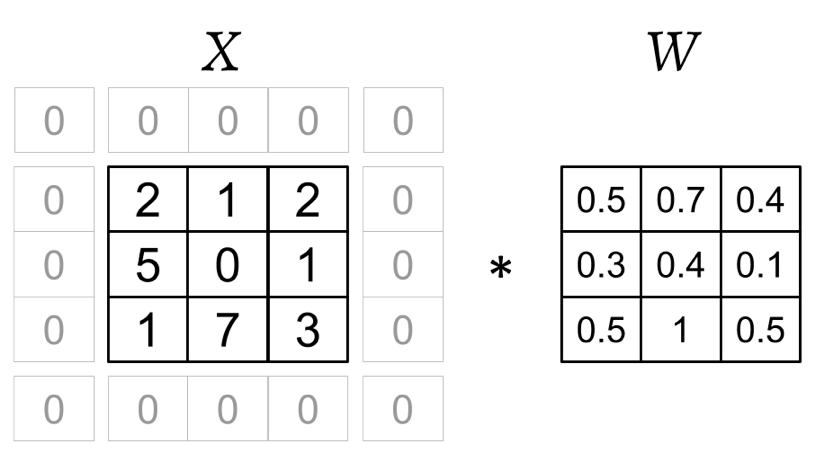

In [8]:
Image(filename='rysunki/15_04.png', width=700) 

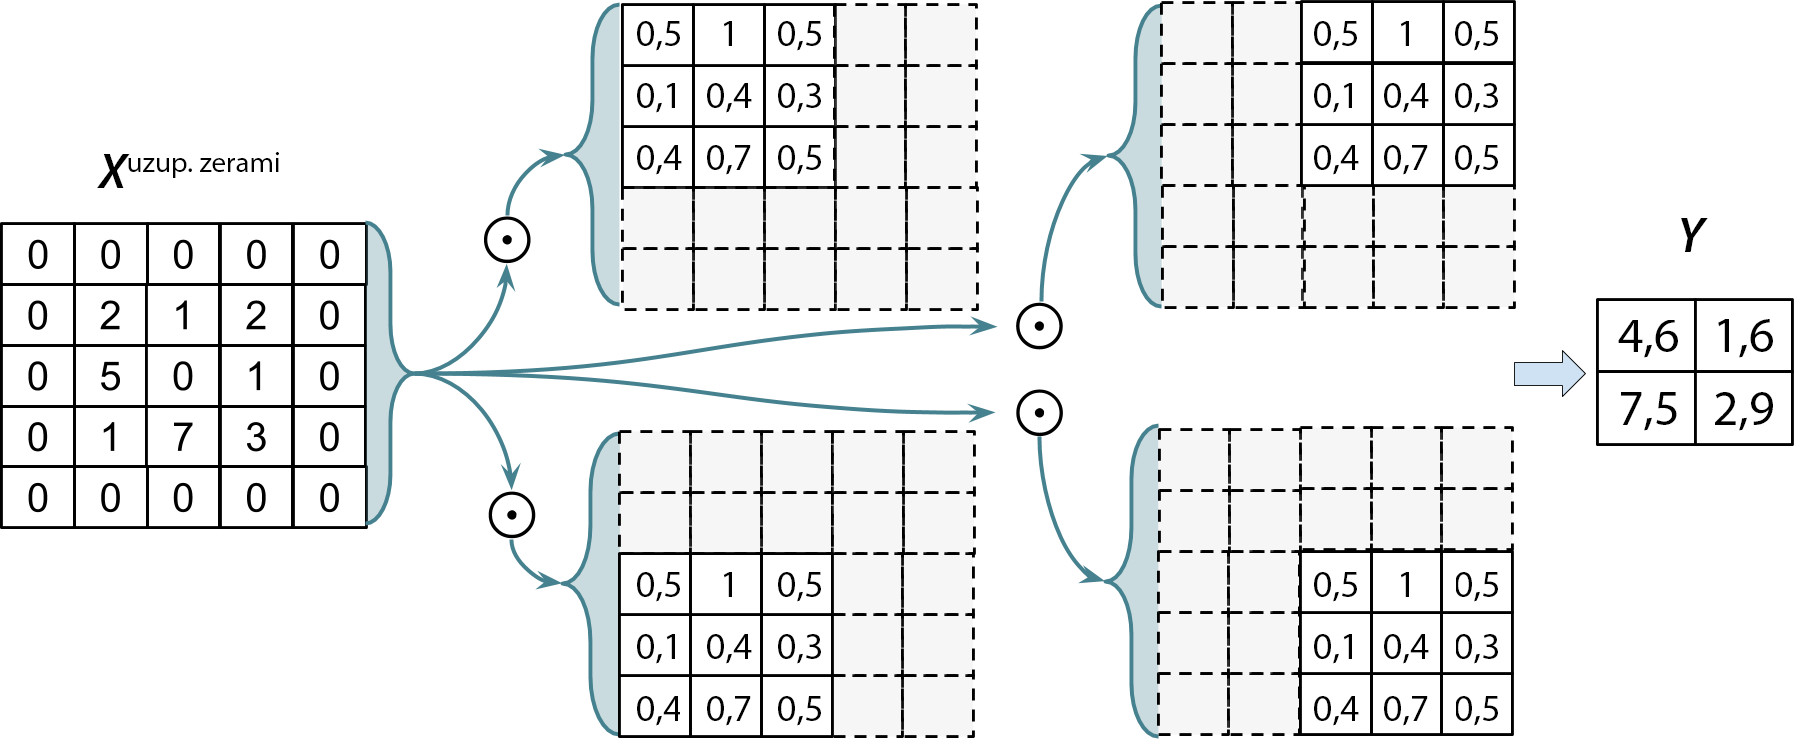

In [6]:
Image(filename='rysunki/15_05.png', width=900) 

In [11]:
import numpy as np
import scipy.signal


def conv2d(X, W, p=(0,0), s=(1,1)):
    W_rot = np.array(W)[::-1,::-1]
    X_orig = np.array(X)
    n1 = X_orig.shape[0] + 2*p[0]
    n2 = X_orig.shape[1] + 2*p[1]
    X_padded = np.zeros(shape=(n1,n2))
    X_padded[p[0]:p[0] + X_orig.shape[0], 
             p[1]:p[1] + X_orig.shape[1]] = X_orig

    res = []
    for i in range(0, int((X_padded.shape[0] - 
                           W_rot.shape[0])/s[0])+1, s[0]):
        res.append([])
        for j in range(0, int((X_padded.shape[1] - 
                               W_rot.shape[1])/s[1])+1, s[1]):
            X_sub = X_padded[i:i+W_rot.shape[0], j:j+W_rot.shape[1]]
            res[-1].append(np.sum(X_sub * W_rot))
    return(np.array(res))
    
X = [[1, 3, 2, 4], [5, 6, 1, 3], [1 , 2,0, 2], [3, 4, 3, 2]]
W = [[1, 0, 3], [1, 2, 1], [0, 1, 1]]
print('Implementacja splotu dwuwymiarowego: \n', 
      conv2d(X, W, p=(1,1), s=(1,1)))

print('Wyniki uzyskane w module SciPy: \n', 
      scipy.signal.convolve2d(X, W, mode='same'))



Implementacja splotu dwuwymiarowego: 
 [[11. 25. 32. 13.]
 [19. 25. 24. 13.]
 [13. 28. 25. 17.]
 [11. 17. 14.  9.]]
Wyniki uzyskane w module SciPy: 
 [[11 25 32 13]
 [19 25 24 13]
 [13 28 25 17]
 [11 17 14  9]]


## Podpróbkowanie

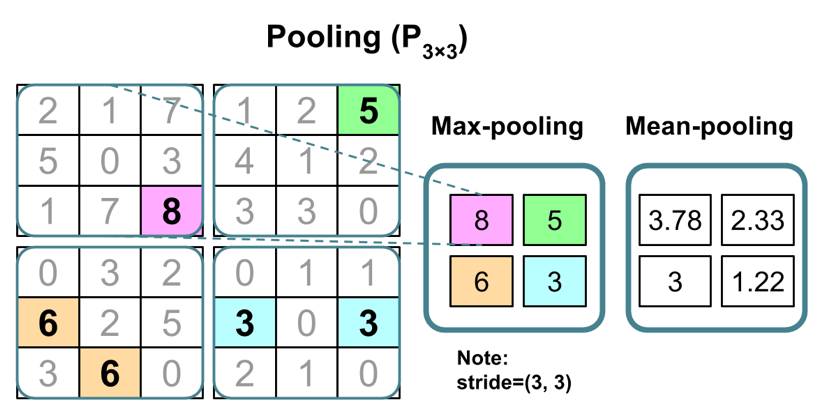

In [12]:
Image(filename='rysunki/15_06.png', width=700) 

# Konstruowanie sieci CNN 

## Praca z wieloma kanałami wejściowymi/barw

In [16]:
# imageio.imread zastępuje
# scipy.misc.imread w scipy >= 1.2.0

import imageio

try:
    img = imageio.imread('./przykładowy-obraz.png', pilmode='RGB')
except AttributeError:
    s = ("imageio.imread wymaga biblioteki obrazów PIL"
         " Możesz spełnić ten wymóg instalując przystępną"
         " wersję - PILLOW - za pomocą komendy `pip install pillow`.")
    raise AttributeError(s)
    
    
print('Wymiary obrazu:', img.shape)
print('Liczba kanałów:', img.shape[2])
print('Typ danych obrazu:', img.dtype)

print(img[100:102, 100:102, :])

Wymiary obrazu: (252, 221, 3)
Liczba kanałów: 3
Typ danych obrazu: uint8
[[[179 134 110]
  [182 136 112]]

 [[180 135 111]
  [182 137 113]]]


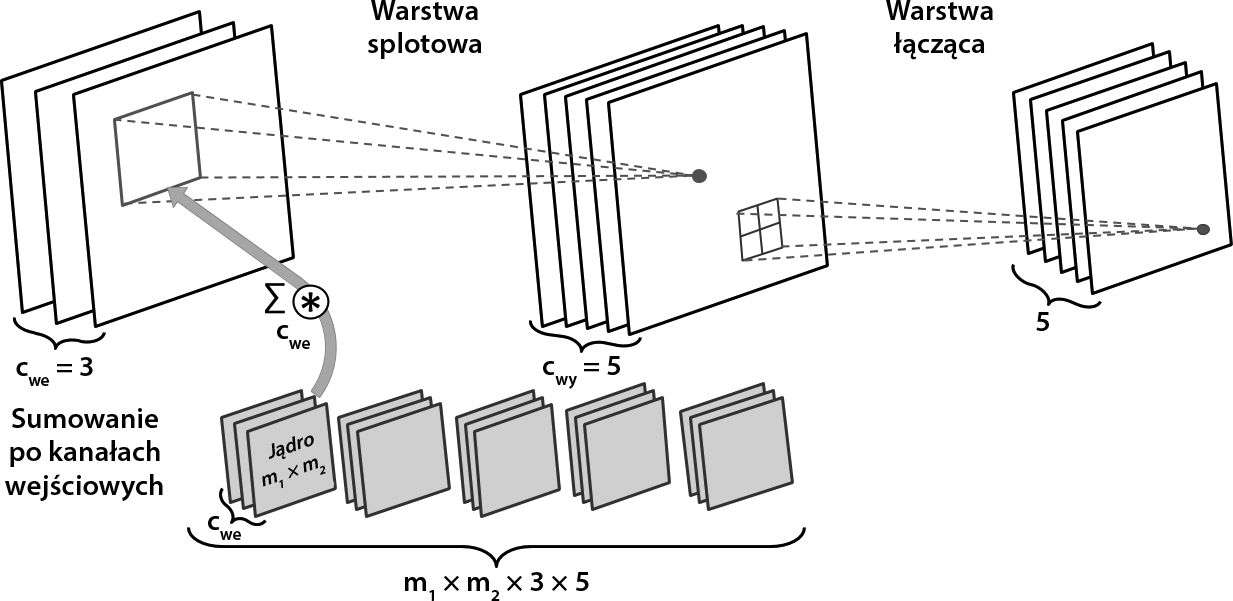

In [7]:
Image(filename='rysunki/15_07.png', width=800) 

## Regularyzowanie sieci neuronowej metodą porzucania

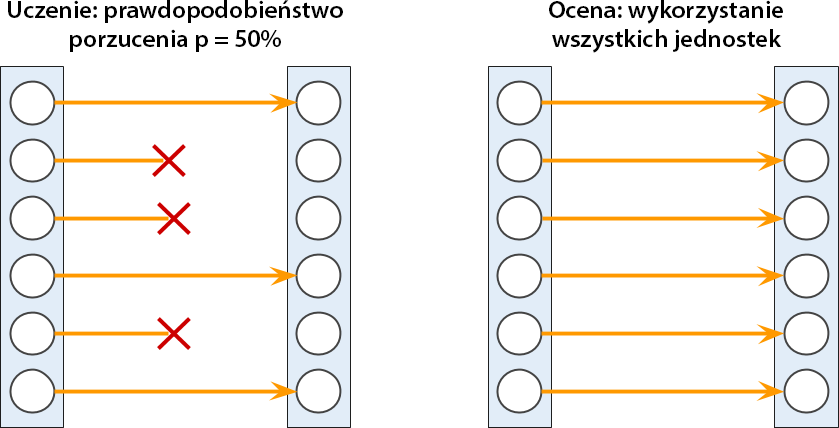

In [8]:
Image(filename='rysunki/15_08.png', width=800) 

# Implementacja głębokiej sieci splotowej za pomocą biblioteki TensorFlow

## Architektura wielowarstwowej sieci CNN

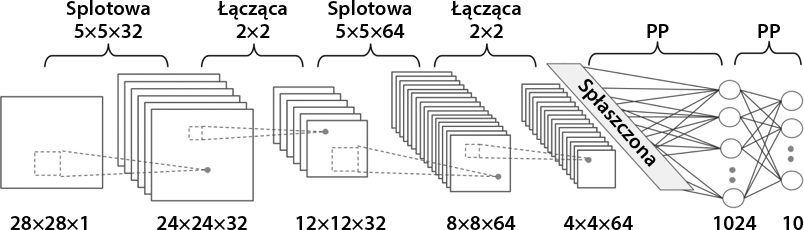

In [9]:
Image(filename='rysunki/15_09.png', width=800) 

## Wczytywanie i wstępne przetwarzanie danych

In [20]:
## rozpakowuje zestaw danych MNIST

import sys
import gzip
import shutil
import os


if (sys.version_info > (3, 0)):
    writemode = 'wb'
else:
    writemode = 'w'

zipped_mnist = [f for f in os.listdir('./')
                if f.endswith('ubyte.gz')]
for z in zipped_mnist:
    with gzip.GzipFile(z, mode='rb') as decompressed, open(z[:-3], writemode) as outfile:
        outfile.write(decompressed.read())

In [21]:
import struct
import numpy as np


def load_mnist(path, kind='train'):
    """Wczytuje dane zestawu MNIST z katalogu zdefiniowanego w zmiennej `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte'
                                % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte'
                               % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',
                                 lbpath.read(8))
        labels = np.fromfile(lbpath,
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII",
                                               imgpath.read(16))
        images = np.fromfile(imgpath,
                             dtype=np.uint8).reshape(len(labels), 784)

    return images, labels


X_data, y_data = load_mnist('./', kind='train')
print('Rzędy: %d,  Kolumny: %d' % (X_data.shape[0], X_data.shape[1]))
X_test, y_test = load_mnist('./', kind='t10k')
print('Rzędy: %d,  Kolumny: %d' % (X_test.shape[0], X_test.shape[1]))

X_train, y_train = X_data[:50000,:], y_data[:50000]
X_valid, y_valid = X_data[50000:,:], y_data[50000:]

print('Zbiór uczący:   ', X_train.shape, y_train.shape)
print('Zbiór walidacyjny: ', X_valid.shape, y_valid.shape)
print('Zbiór testowy:   ', X_test.shape, y_test.shape)

Rzędy: 60000,  Kolumny: 784
Rzędy: 10000,  Kolumny: 784
Zbiór uczący:    (50000, 784) (50000,)
Zbiór walidacyjny:  (10000, 784) (10000,)
Zbiór testowy:    (10000, 784) (10000,)


In [22]:
def batch_generator(X, y, batch_size=64, 
                    shuffle=False, random_seed=None):
    
    idx = np.arange(y.shape[0])
    
    if shuffle:
        rng = np.random.RandomState(random_seed)
        rng.shuffle(idx)
        X = X[idx]
        y = y[idx]
    
    for i in range(0, X.shape[0], batch_size):
        yield (X[i:i+batch_size, :], y[i:i+batch_size])

In [23]:
mean_vals = np.mean(X_train, axis=0)
std_val = np.std(X_train)

X_train_centered = (X_train - mean_vals)/std_val
X_valid_centered = (X_valid - mean_vals)/std_val
X_test_centered = (X_test - mean_vals)/std_val

del X_data, y_data, X_train, X_valid, X_test

## Implementowanie sieci CNN za pomocą podstawowego interfejsu TensorFlow

In [24]:
import tensorflow as tf
import numpy as np


## funkcje opakowujące

def conv_layer(input_tensor, name,
               kernel_size, n_output_channels, 
               padding_mode='SAME', strides=(1, 1, 1, 1)):
    with tf.variable_scope(name):
        ## pobiera n_input_channels::
        ##   wymiary tensora wejściowego: 
        ##   [grupa x szerokość x wysokość x kanały]
        input_shape = input_tensor.get_shape().as_list()
        n_input_channels = input_shape[-1] 

        weights_shape = (list(kernel_size) + 
                         [n_input_channels, n_output_channels])

        weights = tf.get_variable(name='_wagi',
                                  shape=weights_shape)
        print(weights)
        biases = tf.get_variable(name='_obciazenia',
                                 initializer=tf.zeros(
                                     shape=[n_output_channels]))
        print(biases)
        conv = tf.nn.conv2d(input=input_tensor, 
                            filter=weights,
                            strides=strides, 
                            padding=padding_mode)
        print(conv)
        conv = tf.nn.bias_add(conv, biases, 
                              name='przed-aktywacja_calkowita')
        print(conv)
        conv = tf.nn.relu(conv, name='aktywacja')
        print(conv)
        
        return conv
    

## testowanie
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(tf.float32, shape=[None, 28, 28, 1])
    conv_layer(x, name='test_splotu', kernel_size=(3, 3), n_output_channels=32)
    
del g, x

<tf.Variable 'test_splotu/_wagi:0' shape=(3, 3, 1, 32) dtype=float32_ref>
<tf.Variable 'test_splotu/_obciazenia:0' shape=(32,) dtype=float32_ref>
Tensor("test_splotu/Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("test_splotu/przed-aktywacja_calkowita:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("test_splotu/aktywacja:0", shape=(?, 28, 28, 32), dtype=float32)


In [25]:
def fc_layer(input_tensor, name, 
             n_output_units, activation_fn=None):
    with tf.variable_scope(name):
        input_shape = input_tensor.get_shape().as_list()[1:]
        n_input_units = np.prod(input_shape)
        if len(input_shape) > 1:
            input_tensor = tf.reshape(input_tensor, 
                                      shape=(-1, n_input_units))

        weights_shape = [n_input_units, n_output_units]

        weights = tf.get_variable(name='_wagi',
                                  shape=weights_shape)
        print(weights)
        biases = tf.get_variable(name='_obciazenia',
                                 initializer=tf.zeros(
                                     shape=[n_output_units]))
        print(biases)
        layer = tf.matmul(input_tensor, weights)
        print(layer)
        layer = tf.nn.bias_add(layer, biases,
                              name='przed-aktywacja_calkowita')
        print(layer)
        if activation_fn is None:
            return layer
        
        layer = activation_fn(layer, name='aktywacja')
        print(layer)
        return layer

    
## testowanie:
g = tf.Graph()
with g.as_default():
    x = tf.placeholder(tf.float32, 
                       shape=[None, 28, 28, 1])
    fc_layer(x, name='test_pp', n_output_units=32, 
             activation_fn=tf.nn.relu)
    
del g, x

<tf.Variable 'test_pp/_wagi:0' shape=(784, 32) dtype=float32_ref>
<tf.Variable 'test_pp/_obciazenia:0' shape=(32,) dtype=float32_ref>
Tensor("test_pp/MatMul:0", shape=(?, 32), dtype=float32)
Tensor("test_pp/przed-aktywacja_calkowita:0", shape=(?, 32), dtype=float32)
Tensor("test_pp/aktywacja:0", shape=(?, 32), dtype=float32)


In [32]:
def build_cnn(learning_rate=1e-4):
    ## Węzły zastępcze dla zmiennych X i y:
    tf_x = tf.placeholder(tf.float32, shape=[None, 784],
                          name='tf_x')
    tf_y = tf.placeholder(tf.int32, shape=[None],
                          name='tf_y')

    # przekształca x do postaci tensora czterowymiarowego: 
    # [rozmiar_grupy, szerokość, wysokość, 1]
    tf_x_image = tf.reshape(tf_x, shape=[-1, 28, 28, 1],
                            name='tf_x_przeksztalcony')
    ## Kodowanie „gorącojedynkowe”:
    tf_y_onehot = tf.one_hot(indices=tf_y, depth=10,
                             dtype=tf.float32,
                             name='tf_y_goracojedynkowe')

    ## Pierwsza warstwa: splot_1
    print('\nBudowanie pierwszej warstwy: ')
    h1 = conv_layer(tf_x_image, name='splot_1',
                    kernel_size=(5, 5), 
                    padding_mode='SAME',
                    n_output_channels=32)
    ## Łączenie maksymalizujące
    h1_pool = tf.nn.max_pool(h1, 
                             ksize=[1, 2, 2, 1],
                             strides=[1, 2, 2, 1], 
                             padding='SAME')
    ## Druga warstwa: splot_2
    print('\nBudowanie drugiej warstwy: ')
    h2 = conv_layer(h1_pool, name='splot_2', 
                    kernel_size=(5,5), 
                    padding_mode='SAME',
                    n_output_channels=64)
    ## Łączenie maksymalizujące 
    h2_pool = tf.nn.max_pool(h2, 
                             ksize=[1, 2, 2, 1],
                             strides=[1, 2, 2, 1], 
                             padding='SAME')

    ## Trzecia warstwa: w pełni połączona
    print('\nBudowanie trzeciej warstwy:')
    h3 = fc_layer(h2_pool, name='pp_3',
                  n_output_units=1024, 
                  activation_fn=tf.nn.relu)

    ## Porzucanie
    keep_prob = tf.placeholder(tf.float32, name='pp_prawd_pozost')
    h3_drop = tf.nn.dropout(h3, keep_prob=keep_prob, 
                            name='warstwa_porzucania')

    ## Czwarta warstwa: w pełni połączona (aktywacja liniowa)
    print('\nBudowanie czwartej warstwy:')
    h4 = fc_layer(h3_drop, name='pp_4',
                  n_output_units=10, 
                  activation_fn=None)

    ## Prognozowanie
    predictions = {
        'probabilities' : tf.nn.softmax(h4, name='prawdopodobienstwa'),
        'labels' : tf.cast(tf.argmax(h4, axis=1), tf.int32,
                           name='etykiety')
    }
    
    ## Wizualizowanie grafu w aplikacji TensorBoard:

    ## Funkcja straty i optymalizacja
    cross_entropy_loss = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits(
            logits=h4, labels=tf_y_onehot),
        name='strata_entropia_krzyzowa')

    ## Optymalizator:
    optimizer = tf.train.AdamOptimizer(learning_rate)
    optimizer = optimizer.minimize(cross_entropy_loss,
                                   name='op_uczenia')

    ## Obliczanie dokładności przewidywań
    correct_predictions = tf.equal(
        predictions['labels'], 
        tf_y, name='prawidlowe_predy')

    accuracy = tf.reduce_mean(
        tf.cast(correct_predictions, tf.float32),
        name='dokladnosc')

    
def save(saver, sess, epoch, path='./model/'):
    if not os.path.isdir(path):
        os.makedirs(path)
    print('Zapisywanie modelu w %s' % path)
    saver.save(sess, os.path.join(path,'cnn-model.ckpt'),
               global_step=epoch)

    
def load(saver, sess, path, epoch):
    print('Wczytywanie modelu z %s' % path)
    saver.restore(sess, os.path.join(
            path, 'cnn-model.ckpt-%d' % epoch))

    
def train(sess, training_set, validation_set=None,
          initialize=True, epochs=20, shuffle=True,
          dropout=0.5, random_seed=None):

    X_data = np.array(training_set[0])
    y_data = np.array(training_set[1])
    training_loss = []

    ## inicjowanie zmiennych
    if initialize:
        sess.run(tf.global_variables_initializer())

    np.random.seed(random_seed) # do tasowania w batch_generator
    for epoch in range(1, epochs+1):
        batch_gen = batch_generator(
                        X_data, y_data, 
                        shuffle=shuffle)
        avg_loss = 0.0
        for i,(batch_x,batch_y) in enumerate(batch_gen):
            feed = {'tf_x:0': batch_x, 
                    'tf_y:0': batch_y, 
                    'pp_prawd_pozost:0': dropout}
            loss, _ = sess.run(
                    ['strata_entropia_krzyzowa:0', 'op_uczenia'],
                    feed_dict=feed)
            avg_loss += loss

        training_loss.append(avg_loss / (i+1))
        print('Epoka %02d. Uśredniona strata w czasie uczenia: %7.3f' % (
            epoch, avg_loss), end=' ')
        if validation_set is not None:
            feed = {'tf_x:0': validation_set[0],
                    'tf_y:0': validation_set[1],
                    'pp_prawd_pozost:0':1.0}
            valid_acc = sess.run('dokladnosc:0', feed_dict=feed)
            print(' Dokładność walidacji: %7.3f' % valid_acc)
        else:
            print()

            
def predict(sess, X_test, return_proba=False):
    feed = {'tf_x:0': X_test, 
            'pp_prawd_pozost:0': 1.0}
    if return_proba:
        return sess.run('prawdopodobienstwa:0', feed_dict=feed)
    else:
        return sess.run('etykiety:0', feed_dict=feed)

In [33]:
import tensorflow as tf
import numpy as np

## Definiuje ziarno losowości
random_seed = 123

np.random.seed(random_seed)


## tworzy graf
g = tf.Graph()
with g.as_default():
    tf.set_random_seed(random_seed)
    ## buduje graf
    build_cnn()

    ## obiekt zapisujący:
    saver = tf.train.Saver()


Budowanie pierwszej warstwy: 
<tf.Variable 'splot_1/_wagi:0' shape=(5, 5, 1, 32) dtype=float32_ref>
<tf.Variable 'splot_1/_obciazenia:0' shape=(32,) dtype=float32_ref>
Tensor("splot_1/Conv2D:0", shape=(?, 24, 24, 32), dtype=float32)
Tensor("splot_1/przed-aktywacja_calkowita:0", shape=(?, 24, 24, 32), dtype=float32)
Tensor("splot_1/aktywacja:0", shape=(?, 24, 24, 32), dtype=float32)

Budowanie drugiej warstwy: 
<tf.Variable 'splot_2/_wagi:0' shape=(5, 5, 32, 64) dtype=float32_ref>
<tf.Variable 'splot_2/_obciazenia:0' shape=(64,) dtype=float32_ref>
Tensor("splot_2/Conv2D:0", shape=(?, 8, 8, 64), dtype=float32)
Tensor("splot_2/przed-aktywacja_calkowita:0", shape=(?, 8, 8, 64), dtype=float32)
Tensor("splot_2/aktywacja:0", shape=(?, 8, 8, 64), dtype=float32)

Budowanie trzeciej warstwy:
<tf.Variable 'pp_3/_wagi:0' shape=(1024, 1024) dtype=float32_ref>
<tf.Variable 'pp_3/_obciazenia:0' shape=(1024,) dtype=float32_ref>
Tensor("pp_3/MatMul:0", shape=(?, 1024), dtype=float32)
Tensor("pp_3/prze

In [28]:
## @Czytelniku: ZIGNORUJ TĘ KOMÓRKĘ
##
## Komórka ta ma na celu zmniejszenie zestawu danych
## w sytuacji, gdy notatnik ten 
## jest uruchamiany na platformie Travis Continuous Integration;
## służy to testowaniu kodu, jak również
## przyśpieszeniu obliczeń przy użyciu mniejszego
## zestawu danych.

if 'TRAVIS' in os.environ:
    X_train_centered = X_train_centered[:500]
    y_train = y_train[:500]
    X_valid_centered = X_valid_centered[:500]
    y_valid = y_valid[:500]

In [34]:
## Tworzy sesję TF 
## i uczy model sieci CNN

with tf.Session(graph=g) as sess:
    train(sess, 
          training_set=(X_train_centered, y_train), 
          validation_set=(X_valid_centered, y_valid), 
          initialize=True,
          random_seed=123)
    save(saver, sess, epoch=20)

Epoka 01 Uśredniona strata w czasie uczenia: 277.549  Dokładność walidacji:   0.974
Epoka 02 Uśredniona strata w czasie uczenia:  75.433  Dokładność walidacji:   0.983
Epoka 03 Uśredniona strata w czasie uczenia:  51.397  Dokładność walidacji:   0.987
Epoka 04 Uśredniona strata w czasie uczenia:  39.684  Dokładność walidacji:   0.988
Epoka 05 Uśredniona strata w czasie uczenia:  32.736  Dokładność walidacji:   0.988
Epoka 06 Uśredniona strata w czasie uczenia:  27.363  Dokładność walidacji:   0.989
Epoka 07 Uśredniona strata w czasie uczenia:  23.550  Dokładność walidacji:   0.988
Epoka 08 Uśredniona strata w czasie uczenia:  19.939  Dokładność walidacji:   0.990
Epoka 09 Uśredniona strata w czasie uczenia:  18.115  Dokładność walidacji:   0.990
Epoka 10 Uśredniona strata w czasie uczenia:  14.763  Dokładność walidacji:   0.991
Epoka 11 Uśredniona strata w czasie uczenia:  13.211  Dokładność walidacji:   0.991
Epoka 12 Uśredniona strata w czasie uczenia:  12.358  Dokładność walidacji: 

In [35]:
### Oblicza dokładność predykcji
### dla zbioru testowego
### wczytuje zapisany model

del g

## tworzy nowy graf 
## i buduje model
g2 = tf.Graph()
with g2.as_default():
    tf.set_random_seed(random_seed)
    ## buduje graf
    build_cnn()

    ## obiekt zapisujący:
    saver = tf.train.Saver()

## tworzy nową sesję 
## i wczytuje model
with tf.Session(graph=g2) as sess:
    load(saver, sess, 
         epoch=20, path='./model/')
    
    preds = predict(sess, X_test_centered, 
                    return_proba=False)

    print('Dokładność dla zbioru testowego: %.3f%%' % (100*
                np.sum(preds == y_test)/len(y_test)))
    


Budowanie pierwszej warstwy: 
<tf.Variable 'splot_1/_wagi:0' shape=(5, 5, 1, 32) dtype=float32_ref>
<tf.Variable 'splot_1/_obciazenia:0' shape=(32,) dtype=float32_ref>
Tensor("splot_1/Conv2D:0", shape=(?, 24, 24, 32), dtype=float32)
Tensor("splot_1/przed-aktywacja_calkowita:0", shape=(?, 24, 24, 32), dtype=float32)
Tensor("splot_1/aktywacja:0", shape=(?, 24, 24, 32), dtype=float32)

Budowanie drugiej warstwy: 
<tf.Variable 'splot_2/_wagi:0' shape=(5, 5, 32, 64) dtype=float32_ref>
<tf.Variable 'splot_2/_obciazenia:0' shape=(64,) dtype=float32_ref>
Tensor("splot_2/Conv2D:0", shape=(?, 8, 8, 64), dtype=float32)
Tensor("splot_2/przed-aktywacja_calkowita:0", shape=(?, 8, 8, 64), dtype=float32)
Tensor("splot_2/aktywacja:0", shape=(?, 8, 8, 64), dtype=float32)

Budowanie trzeciej warstwy:
<tf.Variable 'pp_3/_wagi:0' shape=(1024, 1024) dtype=float32_ref>
<tf.Variable 'pp_3/_obciazenia:0' shape=(1024,) dtype=float32_ref>
Tensor("pp_3/MatMul:0", shape=(?, 1024), dtype=float32)
Tensor("pp_3/prze

In [36]:
## uzyskuje prognozę dla
##  niektórych przykładów testowych

np.set_printoptions(precision=2, suppress=True)

with tf.Session(graph=g2) as sess:
    load(saver, sess, 
         epoch=20, path='./model/')
        
    print(predict(sess, X_test_centered[:10], 
              return_proba=False))
    
    print(predict(sess, X_test_centered[:10], 
                  return_proba=True))

Wczytywanie modelu z ./model/
INFO:tensorflow:Restoring parameters from ./model/cnn-model.ckpt-20
[7 2 1 0 4 1 4 9 5 9]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [37]:
## kontynuuje uczenie przez 20 kolejnych epok
## bez ponownego inicjowania :: initialize =False
## tworzy nową sesję 
## i wczytuje model
with tf.Session(graph=g2) as sess:
    load(saver, sess, 
         epoch=20, path='./model/')
    
    train(sess,
          training_set=(X_train_centered, y_train), 
          validation_set=(X_valid_centered, y_valid),
          initialize=False,
          epochs=20,
          random_seed=123)
        
    save(saver, sess, epoch=40, path='./model/')
    
    preds = predict(sess, X_test_centered, 
                    return_proba=False)
    
    print('Dokładność dla zbioru testowego: %.3f%%' % (100*
                np.sum(preds == y_test)/len(y_test)))

Wczytywanie modelu z ./model/
INFO:tensorflow:Restoring parameters from ./model/cnn-model.ckpt-20
Epoka 01 Uśredniona strata w czasie uczenia:   4.946  Dokładność walidacji:   0.992
Epoka 02 Uśredniona strata w czasie uczenia:   3.667  Dokładność walidacji:   0.991
Epoka 03 Uśredniona strata w czasie uczenia:   3.542  Dokładność walidacji:   0.992
Epoka 04 Uśredniona strata w czasie uczenia:   3.112  Dokładność walidacji:   0.991
Epoka 05 Uśredniona strata w czasie uczenia:   3.412  Dokładność walidacji:   0.993
Epoka 06 Uśredniona strata w czasie uczenia:   3.090  Dokładność walidacji:   0.992
Epoka 07 Uśredniona strata w czasie uczenia:   2.978  Dokładność walidacji:   0.992
Epoka 08 Uśredniona strata w czasie uczenia:   2.725  Dokładność walidacji:   0.992
Epoka 09 Uśredniona strata w czasie uczenia:   2.785  Dokładność walidacji:   0.992
Epoka 10 Uśredniona strata w czasie uczenia:   1.784  Dokładność walidacji:   0.993
Epoka 11 Uśredniona strata w czasie uczenia:   2.549  Dokładno

In [38]:
## buduje model
def build_cnn():
    ## Węzły zastępcze dla danych X i y:
    tf_x = tf.placeholder(tf.float32, shape=[None, 784],
                          name='tf_x')
    tf_y = tf.placeholder(tf.int32, shape=[None],
                          name='tf_y')

    # przekształca x do postaci czterowymiarowego tensora: 
    # [rozmiar_grupy, szerokość, wysokość, 1]
    tf_x_image = tf.reshape(tf_x, shape=[-1, 28, 28, 1],
                            name='tf_x_przekszt')
    ## One-hot encoding:
    tf_y_onehot = tf.one_hot(indices=tf_y, depth=10,
                             dtype=tf.float32,
                             name='tf_y_goracojedynkowe')

    ## Pierwsza warstwa: splot_1
    print('\nBudowanie pierwszej warstwy: ')
    h1 = conv_layer(tf_x_image, name='splot_1',
                    kernel_size=(5, 5), 
                    padding_mode='VALID',
                    n_output_channels=32)
    ## Łączenie maksymalizujące
    h1_pool = tf.nn.max_pool(h1, 
                             ksize=[1, 2, 2, 1],
                             strides=[1, 2, 2, 1], 
                             padding='SAME')
    ## Druga warstwa: splot_2
    print('\nBudowanie drugiej warstwy: ')
    h2 = conv_layer(h1_pool, name='splot_2', 
                    kernel_size=(5, 5), 
                    padding_mode='VALID',
                    n_output_channels=64)
    ## Łączenie maksymalizujące 
    h2_pool = tf.nn.max_pool(h2, 
                             ksize=[1, 2, 2, 1],
                             strides=[1, 2, 2, 1], 
                             padding='SAME')

    ## Trzecia warstwa: w pełni połączona
    print('\nBudowanie trzeciej warstwy:')
    h3 = fc_layer(h2_pool, name='pp_3',
                  n_output_units=1024, 
                  activation_fn=tf.nn.relu)

    ## Porzucanie
    keep_prob = tf.placeholder(tf.float32, name='pp_prawd_pozost')
    h3_drop = tf.nn.dropout(h3, keep_prob=keep_prob, 
                            name='warstwa_porzucania')

    ## Czwarta warstwa: w pełni połączona (aktywacja liniowa)
    print('\nBudowanie czwartej warstwy:')
    h4 = fc_layer(h3_drop, name='pp_4',
                  n_output_units=10, 
                  activation_fn=None)

    ## Prognozowanie
    predictions = {
        'probabilities': tf.nn.softmax(h4, name='prawdopodobienstwa'),
        'labels': tf.cast(tf.argmax(h4, axis=1), tf.int32,
                           name='etykiety')
    }

## tworzy graf
g = tf.Graph()
with g.as_default():
    tf.set_random_seed(random_seed)
    ## buduje graf
    build_cnn()
    

with tf.Session(graph=g) as sess:
    file_writer = tf.summary.FileWriter(logdir='./tensorboard/', graph=g)


Budowanie pierwszej warstwy: 
<tf.Variable 'splot_1/_wagi:0' shape=(5, 5, 1, 32) dtype=float32_ref>
<tf.Variable 'splot_1/_obciazenia:0' shape=(32,) dtype=float32_ref>
Tensor("splot_1/Conv2D:0", shape=(?, 24, 24, 32), dtype=float32)
Tensor("splot_1/przed-aktywacja_calkowita:0", shape=(?, 24, 24, 32), dtype=float32)
Tensor("splot_1/aktywacja:0", shape=(?, 24, 24, 32), dtype=float32)

Budowanie drugiej warstwy: 
<tf.Variable 'splot_2/_wagi:0' shape=(5, 5, 32, 64) dtype=float32_ref>
<tf.Variable 'splot_2/_obciazenia:0' shape=(64,) dtype=float32_ref>
Tensor("splot_2/Conv2D:0", shape=(?, 8, 8, 64), dtype=float32)
Tensor("splot_2/przed-aktywacja_calkowita:0", shape=(?, 8, 8, 64), dtype=float32)
Tensor("splot_2/aktywacja:0", shape=(?, 8, 8, 64), dtype=float32)

Budowanie trzeciej warstwy:
<tf.Variable 'pp_3/_wagi:0' shape=(1024, 1024) dtype=float32_ref>
<tf.Variable 'pp_3/_obciazenia:0' shape=(1024,) dtype=float32_ref>
Tensor("pp_3/MatMul:0", shape=(?, 1024), dtype=float32)
Tensor("pp_3/prze

#### Wizualizowanie grafu w aplikacji TensorBoard

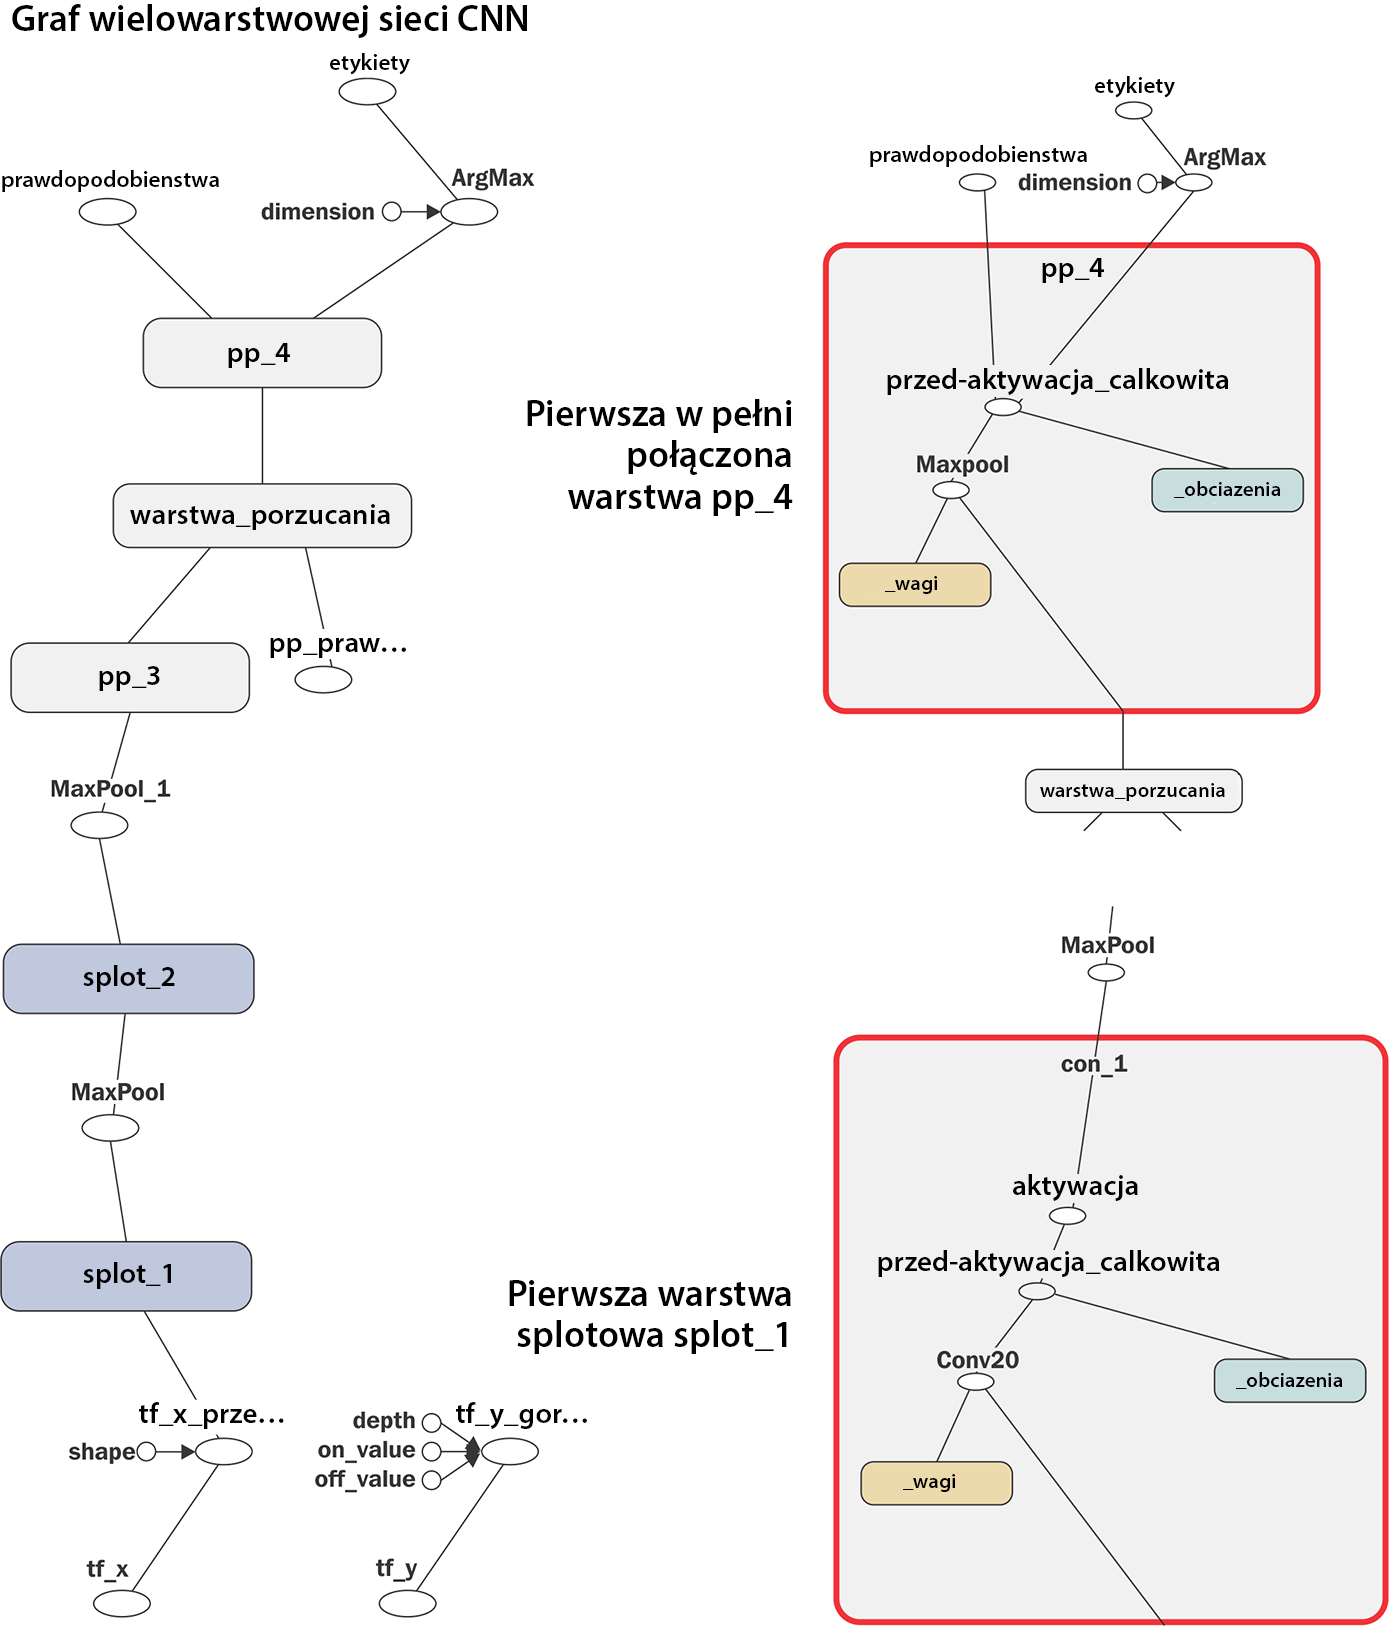

In [10]:
Image(filename='rysunki/15_10.png', width=800) 

## Implementowanie sieci CNN za pomocą interfejsu Layers

In [40]:
import tensorflow as tf
import numpy as np


class ConvNN(object):
    def __init__(self, batchsize=64,
                 epochs=20, learning_rate=1e-4, 
                 dropout_rate=0.5,
                 shuffle=True, random_seed=None):
        np.random.seed(random_seed)
        self.batchsize = batchsize
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.dropout_rate = dropout_rate
        self.shuffle = shuffle
                
        g = tf.Graph()
        with g.as_default():
            ## wyznacza ziarno losowości:
            tf.set_random_seed(random_seed)
            
            ## buduje sieć:
            self.build()

            ## inicjator
            self.init_op = \
                tf.global_variables_initializer()

            ## obiekt zapisujący
            self.saver = tf.train.Saver()
            
        ## tworzy sesję
        self.sess = tf.Session(graph=g)
                
    def build(self):
        
        ## węzły zastępcze dla X i y:
        tf_x = tf.placeholder(tf.float32, 
                              shape=[None, 784],
                              name='tf_x')
        tf_y = tf.placeholder(tf.int32, 
                              shape=[None],
                              name='tf_y')
        is_train = tf.placeholder(tf.bool, 
                              shape=(),
                              name='is_train')

        ## przekształca x do postaci czterowymiarowego tensora: 
        ##  [rozmiar_grupy, szerokość, wysokość, 1]
        tf_x_image = tf.reshape(tf_x, shape=[-1, 28, 28, 1],
                              name='we_x_obrazy_2d')
        ## Kodowanie gorącojedynkowe:
        tf_y_onehot = tf.one_hot(indices=tf_y, depth=10,
                              dtype=tf.float32,
                              name='we_y_goracojedynkowe')

        ## Pierwsza warstwa: splot_1
        h1 = tf.layers.conv2d(tf_x_image, 
                              kernel_size=(5, 5), 
                              filters=32, 
                              activation=tf.nn.relu)
        ## Łączenie maksymalizujące
        h1_pool = tf.layers.max_pooling2d(h1, 
                              pool_size=(2, 2), 
                              strides=(2, 2))
        ## Druga warstwa: splot_2
        h2 = tf.layers.conv2d(h1_pool, kernel_size=(5,5), 
                              filters=64, 
                              activation=tf.nn.relu)
        ## Łączenie maksymalizujące
        h2_pool = tf.layers.max_pooling2d(h2, 
                              pool_size=(2, 2), 
                              strides=(2, 2))

        ## Trzecia warstwa: w pełni połączona
        input_shape = h2_pool.get_shape().as_list()
        n_input_units = np.prod(input_shape[1:])
        h2_pool_flat = tf.reshape(h2_pool, 
                              shape=[-1, n_input_units])
        h3 = tf.layers.dense(h2_pool_flat, 1024, 
                              activation=tf.nn.relu)

        ## Porzucanie
        h3_drop = tf.layers.dropout(h3, 
                              rate=self.dropout_rate,
                              training=is_train)
        
        ## Czwarta warstwa: w pełni połączona (aktywacja liniowa)
        h4 = tf.layers.dense(h3_drop, 10, 
                              activation=None)

        ## Prognozowanie
        predictions = {
            'probabilities': tf.nn.softmax(h4, 
                              name='prawdopodobienstwa'),
            'labels': tf.cast(tf.argmax(h4, axis=1), 
                              tf.int32, name='etykiety')}
        
        ## Funkcja straty i optymalizacja
        cross_entropy_loss = tf.reduce_mean(
            tf.nn.softmax_cross_entropy_with_logits(
                logits=h4, labels=tf_y_onehot),
            name='strata_entropia_krzyzowa')
        
        ## Optymalizator:
        optimizer = tf.train.AdamOptimizer(self.learning_rate)
        optimizer = optimizer.minimize(cross_entropy_loss,
                                       name='op_uczenia')

        ## Określanie dokładności
        correct_predictions = tf.equal(
            predictions['labels'], 
            tf_y, name='prawid_pred')
        
        accuracy = tf.reduce_mean(
            tf.cast(correct_predictions, tf.float32),
            name='dokladnosc')

    def save(self, epoch, path='./tflayers-model/'):
        if not os.path.isdir(path):
            os.makedirs(path)
        print('Zapisywanie modelu w katalogu %s' % path)
        self.saver.save(self.sess, 
                        os.path.join(path, 'model.ckpt'),
                        global_step=epoch)
        
    def load(self, epoch, path):
        print('Wczytywanie modelu z katalogu %s' % path)
        self.saver.restore(self.sess, 
             os.path.join(path, 'model.ckpt-%d' % epoch))
        
    def train(self, training_set, 
              validation_set=None,
              initialize=True):
        ## inicjuje zmienne
        if initialize:
            self.sess.run(self.init_op)

        self.train_cost_ = []
        X_data = np.array(training_set[0])
        y_data = np.array(training_set[1])

        for epoch in range(1, self.epochs + 1):
            batch_gen = \
                batch_generator(X_data, y_data, 
                                 shuffle=self.shuffle)
            avg_loss = 0.0
            for i, (batch_x,batch_y) in \
                enumerate(batch_gen):
                feed = {'tf_x:0': batch_x, 
                        'tf_y:0': batch_y,
                        'is_train:0': True} ## do porzucania
                loss, _ = self.sess.run(
                        ['strata_entropia_krzyzowa:0', 'op_uczenia'], 
                        feed_dict=feed)
                avg_loss += loss
                
            print('Epoka %02d.: Uśredniona strata uczenia: '
                  '%7.3f' % (epoch, avg_loss), end=' ')
            if validation_set is not None:
                feed = {'tf_x:0': batch_x, 
                        'tf_y:0': batch_y,
                        'is_train:0': False} ## do porzucania
                valid_acc = self.sess.run('dokladnosc:0',
                                          feed_dict=feed)
                print('Dokładność walidacji: %7.3f' % valid_acc)
            else:
                print()
                    
    def predict(self, X_test, return_proba = False):
        feed = {'tf_x:0': X_test,
                'is_train:0': False} ## do porzucania
        if return_proba:
            return self.sess.run('prawdopodobienstwa:0',
                                 feed_dict=feed)
        else:
            return self.sess.run('etykiety:0',
                                 feed_dict=feed)




In [41]:
cnn = ConvNN(random_seed=123)

In [42]:
cnn.train(training_set=(X_train_centered, y_train), 
          validation_set=(X_valid_centered, y_valid))

cnn.save(epoch=20)

Epoka 01.: Uśredniona strata uczenia: 269.408 Dokładność walidacji:   0.938
Epoka 02.: Uśredniona strata uczenia:  73.779 Dokładność walidacji:   0.938
Epoka 03.: Uśredniona strata uczenia:  50.604 Dokładność walidacji:   1.000
Epoka 04.: Uśredniona strata uczenia:  40.301 Dokładność walidacji:   1.000
Epoka 05.: Uśredniona strata uczenia:  32.348 Dokładność walidacji:   1.000
Epoka 06.: Uśredniona strata uczenia:  26.845 Dokładność walidacji:   1.000
Epoka 07.: Uśredniona strata uczenia:  22.884 Dokładność walidacji:   1.000
Epoka 08.: Uśredniona strata uczenia:  19.948 Dokładność walidacji:   1.000
Epoka 09.: Uśredniona strata uczenia:  16.771 Dokładność walidacji:   1.000
Epoka 10.: Uśredniona strata uczenia:  14.443 Dokładność walidacji:   1.000
Epoka 11.: Uśredniona strata uczenia:  13.030 Dokładność walidacji:   1.000
Epoka 12.: Uśredniona strata uczenia:  11.494 Dokładność walidacji:   1.000
Epoka 13.: Uśredniona strata uczenia:  10.048 Dokładność walidacji:   1.000
Epoka 14.: U

In [43]:
del cnn

cnn2 = ConvNN(random_seed=123)

cnn2.load(epoch=20, path='./tflayers-model/')

print(cnn2.predict(X_test_centered[:10,:]))

Wczytywanie modelu z katalogu ./tflayers-model/
INFO:tensorflow:Restoring parameters from ./tflayers-model/model.ckpt-20
[7 2 1 0 4 1 4 9 5 9]


In [44]:
preds = cnn2.predict(X_test_centered)

print('Dokładność dla danych testowych: %.2f%%' % (100*
      np.sum(y_test == preds)/len(y_test)))

Dokładność dla danych testowych: 99.31%


# Podsumowanie

...

---

Czytelnicy mogą zignorować poniższą komórkę.

In [45]:
! python ../.convert_notebook_to_script.py --input r15.ipynb --output r15.py

[NbConvertApp] Converting notebook r15.ipynb to script
[NbConvertApp] Writing 29969 bytes to r15.py
Traceback (most recent call last):
  File "../.convert_notebook_to_script.py", line 78, in <module>
    cleanup(args.output)
  File "../.convert_notebook_to_script.py", line 39, in cleanup
    if line != imports[0]:
IndexError: list index out of range
